# 1. Title & Introduction

## Understanding Disease Spread through Mathematical Modeling

### Introduction
In this notebook, we will explore basic mathematical models for the spread of diseases in a population. Specifically, we will look at the **SI** (Susceptible–Infective) and **SIR** (Susceptible–Infective–Recovered) compartmental models. These models are foundational in epidemiology and help us understand how an infection propagates over time.

**Why is this topic important?**  
Accurate modeling of infectious disease spread is crucial for predicting outbreaks, planning interventions, and making informed public-health decisions.

**What you’ll learn**  
- Key concepts of compartmental models in epidemiology  
- How to formulate the SI and SIR models using differential equations  
- How to implement these models in Python  
- How to visualize and interpret the results

# 2. Learning Objectives

By the end of this notebook, you should be able to:

1. **Define** the basic SI and SIR models and understand their assumptions.
2. **Explain** key epidemiological parameters (e.g., infection rate, recovery rate).
3. **Implement** and solve ordinary differential equations (ODEs) for the SI and SIR models in Python.
4. **Visualize** the dynamics of these models using plots.
5. **Interpret** the results to understand how diseases can spread and eventually die out (or persist) within a population.
---

# 3. Background Theory / Conceptual Understanding

## SI Model

In an **SI model**, we split the total population $ N $ into:
- $ S(t) $: Number of **susceptible** individuals (healthy but not immune)
- $ I(t) $: Number of **infective** individuals (currently infected)

### Assumptions:
- No one **leaves** the system (no births, no deaths, no recovery).
- Once a **susceptible** person becomes infected, they remain infected indefinitely.
- Infection occurs through **contact** between susceptible and infected individuals.

### Formulating the SI Model

Since the total population $ N $ remains **constant**, the change in the number of susceptible individuals ($ S $) is determined by how often susceptibles come into **contact** with infectives. The rate of change of susceptibles is given by:

$ \frac{dS}{dt} = -\beta S(t) I(t) $

Since everyone who **leaves** the susceptible category must enter the **infective** category, the rate of change of infectives is:

$ \frac{dI}{dt} = \beta S(t) I(t) $

where:
- $ \beta $ is the **infection (contact) rate**, representing how effectively a disease spreads.

Since $ N = S + I $ is **constant**, as $ I(t) $ grows, $ S(t) $ decreases. The disease **never dies out** in an SI model because **no one recovers**.

### Solving the SI Model

To solve the SI model, we divide the two equations:

$ \frac{dS}{dI} = -1 $

which integrates to:

$ S + I = N $

This confirms that **the total population remains constant**.

A more advanced solution involves separating variables in:

$ \frac{dI}{dt} = \beta S I $

Using $ S = N - I $, we substitute:

$ \frac{dI}{dt} = \beta (N - I) I $

This **nonlinear equation** can be solved using **separation of variables**, but numerical methods like **Euler’s method** or **ODE solvers** are often used.

---

## SIR Model

In an **SIR model**, we extend the SI model by **adding a recovery/removal phase**. The population is now split into:

- $ S(t) $: **Susceptible** (individuals who can be infected)
- $ I(t) $: **Infective** (individuals who have the disease and can spread it)
- $ R(t) $: **Recovered/Removed** (individuals who have recovered or died and can no longer spread the disease)

### Formulating the SIR Model

The system of equations describing the **SIR model** is:

$ \frac{dS}{dt} = -\beta S(t) I(t) $

$ \frac{dI}{dt} = \beta S(t) I(t) - \mu I(t) $

$ \frac{dR}{dt} = \mu I(t) $

where:
- $ \beta $ is the **infection rate**.
- $ \mu $ is the **recovery/removal rate**.
- $ \frac{1}{\mu} $ represents the **average infectious period** before recovery.

The total population remains constant:

$ N = S + I + R $

which means that as people **recover**, they leave the **infected** category and join the **recovered** group.

### Solving the SIR Model

Unlike the SI model, the **SIR model** has **no exact analytical solution** in most cases, but it can be solved **numerically** using methods like:

1. **Euler’s Method**: Approximate solutions step by step.
2. **Runge-Kutta Method**: A more accurate numerical approach.
3. **ODE Solvers (like scipy's `odeint`)**: Solve the system computationally.

To understand **epidemic dynamics**, we define the **Basic Reproductive Number**, $ R_0 $:

$ R_0 = \frac{\beta N}{\mu} $

- If $ R_0 > 1 $, the disease **spreads** and creates an epidemic.
- If $ R_0 < 1 $, the disease **dies out** over time.

### Key Insights:
- In an **SI model**, **everyone eventually gets infected**.
- In an **SIR model**, **some people remain uninfected**, and the disease **eventually disappears**.
- **Mathematical solutions** involve **differential equations** but can be explored **numerically** for practical insights.

---

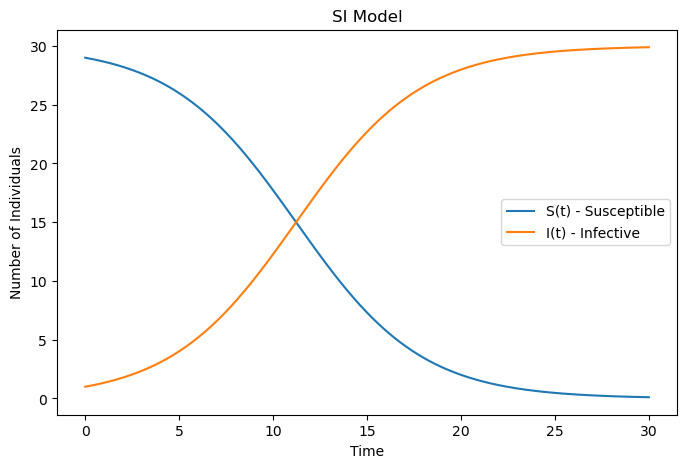

In [10]:
# 5. Code Implementations & Examples

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# For nicer plots (optional), you can increase the default figure size:
plt.rcParams["figure.figsize"] = (8, 5)

def si_model(y, t, beta, N):
    """
    SI model differential equations.
    y : list [S, I]
    t : time
    beta : infection rate
    N : total population
    """
    S, I = y
    dSdt = -beta * S * I
    dIdt =  beta * S * I
    return [dSdt, dIdt]

# Initial conditions for SI model
N_si = 30        # Total population
I0_si = 1        # Initial infectives
S0_si = N_si - I0_si  # Initial susceptibles
beta_si = 0.01  # Infection rate
t_si = np.linspace(0, 30, 300)  # Time grid

# Solve the SI model
solution_si = odeint(si_model, [S0_si, I0_si], t_si, args=(beta_si, N_si))
S_sol_si = solution_si[:, 0]
I_sol_si = solution_si[:, 1]

# Plot SI model results
plt.plot(t_si, S_sol_si, label='S(t) - Susceptible')
plt.plot(t_si, I_sol_si, label='I(t) - Infective')
plt.title('SI Model')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

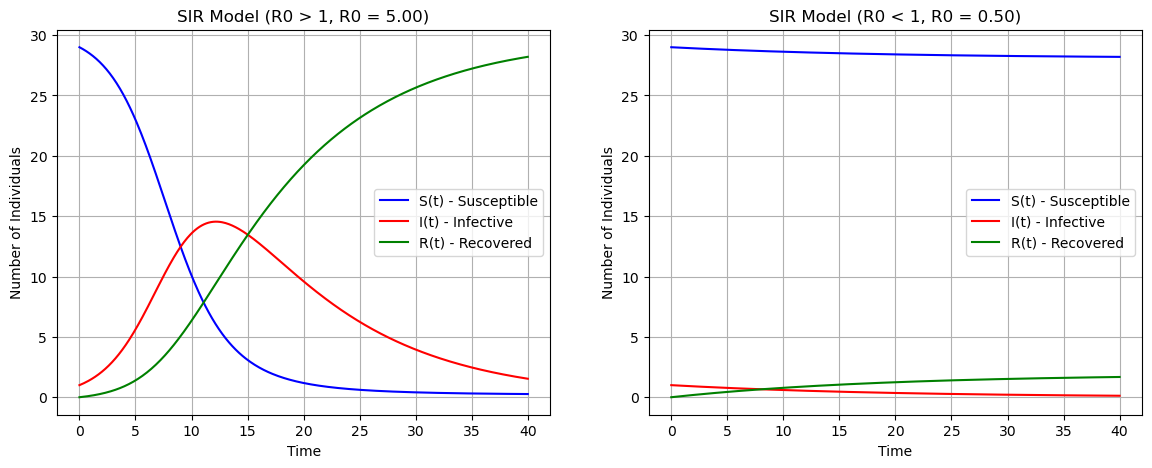

In [2]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function for SIR model
def sir_model(y, t, beta, mu, N):
    """
    SIR model differential equations.
    y : list [S, I, R]
    t : time
    beta : infection rate
    mu : recovery rate
    N : total population
    """
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Initial conditions for SIR model
N_sir = 30       # Total population
I0_sir = 1       # Initial infectives
R0_sir = 0       # Initial recovereds
S0_sir = N_sir - I0_sir - R0_sir  # Initial susceptibles
t_sir = np.linspace(0, 40, 400)   # Time grid

# Case 1: R0 > 1 (Epidemic spreads)
beta_high = 0.5   # High infection rate
mu = 0.1          # Recovery rate
R0_high = beta_high / mu

solution_high = odeint(sir_model, [S0_sir, I0_sir, R0_sir], t_sir, args=(beta_high, mu, N_sir))
S_high, I_high, R_high = solution_high[:, 0], solution_high[:, 1], solution_high[:, 2]

# Case 2: R0 < 1 (Disease dies out)
beta_low = 0.05   # Low infection rate
R0_low = beta_low / mu

solution_low = odeint(sir_model, [S0_sir, I0_sir, R0_sir], t_sir, args=(beta_low, mu, N_sir))
S_low, I_low, R_low = solution_low[:, 0], solution_low[:, 1], solution_low[:, 2]

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot R0 > 1 (epidemic spreads)
axes[0].plot(t_sir, S_high, label='S(t) - Susceptible', color="blue")
axes[0].plot(t_sir, I_high, label='I(t) - Infective', color="red")
axes[0].plot(t_sir, R_high, label='R(t) - Recovered', color="green")
axes[0].set_title(f'SIR Model (R0 > 1, R0 = {R0_high:.2f})')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of Individuals')
axes[0].legend()
axes[0].grid()

# Plot R0 < 1 (disease dies out)
axes[1].plot(t_sir, S_low, label='S(t) - Susceptible', color="blue")
axes[1].plot(t_sir, I_low, label='I(t) - Infective', color="red")
axes[1].plot(t_sir, R_low, label='R(t) - Recovered', color="green")
axes[1].set_title(f'SIR Model (R0 < 1, R0 = {R0_low:.2f})')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Number of Individuals')
axes[1].legend()
axes[1].grid()

plt.show()

# 6. Visualizations & Data Insights

From the plots:

- In the **SI model**, the number of infected individuals grows monotonically until it almost reaches the entire population. Susceptibles decrease toward zero. Because there is no recovery, the epidemic never ends.
- In the **SIR model**, infected individuals grow initially but eventually decrease as more people recover and fewer susceptibles remain to be infected. This leads to a characteristic peak in the $I(t)$ curve. Meanwhile, $R(t)$ rises and levels off, representing the recovered population.

These curves align with the basic intuition: in an SIR model, the outbreak can come to an end because individuals move into the recovered category, reducing the pool of susceptibles.